# Applied Quantum Computing

You will now see some examples of how Quantum Computing can be applied to solve real problems through two commonly applied quantum algorithms.

## Grover's Algorithm - for Search

Grover's algorithm, developed by Lov Grover in 1996, is a quantum algorithm designed to search through an unstructured database or solve an unstructured search problem. It provides a quadratic speedup over classical algorithms.

### Key Concepts:

1. **Problem Statement**: Imagine you have a list of N unsorted items and want to find a specific one that satisfies a particular condition.
   - Classical approach: Check items one by one (O(N) operations in the worst case)
   - Grover's approach: Find the answer in approximately O(√N) operations

2. **Quantum Advantage**: Grover's algorithm achieves this speedup by using quantum superposition and a technique called amplitude amplification to increase the probability of measuring the correct answer.

3. **Applications**:
   - Database searching
   - Cryptography (breaking symmetric key cryptography)
   - Solving NP-complete problems like the traveling salesman problem
   - Optimization problems

4. **Algorithm Steps**:
   - Initialize a quantum system in a superposition of all possible states
   - Apply an oracle function that marks the solution(s)
   - Apply an operation called Grover diffusion that amplifies the amplitude of the marked state(s)
   - Repeat the oracle and diffusion operations approximately √N times
   - Measure the system to obtain the solution with high probability

Let's implement a simple example to demonstrate Grover's algorithm in action.



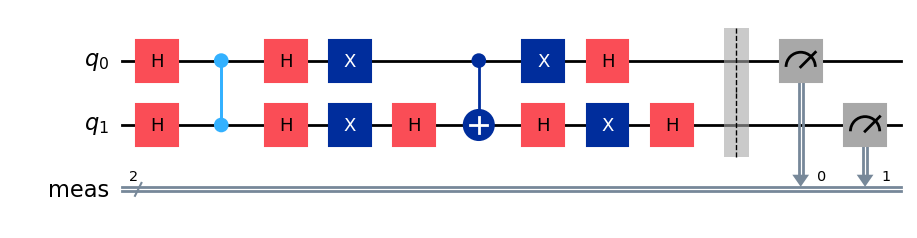

Counts: {'11': 8}


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Grover's algorithm for 2 qubits — search for '11'
qc = QuantumCircuit(2)

# Step 1: Put the qubits in both indices into a superposition
qc.h([0, 1])

# Step 2: Oracle that marks |11⟩ by flipping its phase
# The two parameters are the control qubit (0) and then the target qubit (1)
# So this will effectively flip the phase of the control qubit if the target is |1⟩
qc.cz(0, 1)  # Controlled-Z acts as oracle for |11⟩
# Note: The CZ gate flips the phase of the |11⟩ state, marking it for amplification


# Step 3: Grover diffusion operator
# This is the "amplitude amplification" part that increases the probability of measuring the marked state
# The diffusion operator reflects the quantum state around the average amplitude

# 3a: Transform back to computational basis (undo the initial superposition)
qc.h([0, 1])  # Apply Hadamard gates to both qubits (converts superposition back to |00⟩)

# 3b: Flip all qubits (this changes |00⟩ to |11⟩)
qc.x([0, 1])  # Apply X gates to both qubits (bit flip: |0⟩ → |1⟩, |1⟩ → |0⟩)

# 3c: Apply a controlled phase flip to the |11⟩ state
# This marks the |11⟩ state with a negative phase (same technique as the oracle)
qc.h(1)       # Put qubit 1 in superposition to enable the controlled operation
qc.cx(0, 1)   # Controlled-X: flips qubit 1 only if qubit 0 is |1⟩
qc.h(1)       # Transform back - this sequence (H-CX-H) creates a controlled-Z operation

# 3d: Undo the bit flips (restore the original computational basis)
qc.x([0, 1])  # Apply X gates again to undo step 3b (|11⟩ goes back to |00⟩)

# 3e: Transform back to superposition basis
qc.h([0, 1])  # Apply Hadamard gates to put qubits back into superposition

# The net effect of steps 3a-3e is to reflect all amplitudes around their average,
# which amplifies the marked state and reduces the others

# Step 4: Measurement
qc.measure_all()

display(qc.draw('mpl'))  # Visualize the circuit

# Run the circuit
backend = Aer.get_backend('qasm_simulator')
result = backend.run(qc, shots=8).result()
counts = result.get_counts()
print("Counts:", counts)



## Understanding the "Oracle" in Quantum Computing

In quantum computing, an **oracle** is a special type of quantum function that acts like a "black box" - it can identify the solution(s) to a problem without revealing how it does so.

### Key Properties of an Oracle:

1. **Input**: Takes quantum states as input
2. **Output**: Marks or "flags" the correct answer(s) by applying a phase flip
3. **Reversible**: Must be a reversible quantum operation
4. **Black Box**: We don't need to know how it works internally - just that it can identify solutions

### In Grover's Algorithm Context:

The oracle's job is to **mark the target state(s)** by flipping their phase from positive to negative. This doesn't change the measurement probabilities directly, but it allows the diffusion operator to amplify these marked states.

### Visual Example:

```
Before Oracle:    |00⟩ + |01⟩ + |10⟩ + |11⟩     (all states equal)
After Oracle:     |00⟩ + |01⟩ + |10⟩ - |11⟩     (target |11⟩ marked with - due to the phase flip from the CZ gate)
```

### Types of Oracles in Our Examples:

1. **Simple Oracle** (Cell 2): `qc.cz(0, 1)` marks state |11⟩
2. **Custom Oracle** (Cell 5): More complex function that marks state |10⟩  
3. **Multi-target Oracle** (Cell 9): Marks multiple states like |010⟩ and |110⟩

### Why "Oracle"?

The term comes from classical computer science where an "oracle" is a theoretical device that can solve a decision problem in a single step. In quantum algorithms, the oracle represents the part that "knows" the answer - the rest of the algorithm (like Grover's diffusion) is the clever quantum technique that amplifies this knowledge to get the solution with high probability.

Think of it like having a magic consultant (oracle) who can whisper "that's the one!" when shown the right answer, but can't tell you what the answer is directly. Grover's algorithm is the clever questioning strategy that uses these whispers to find the answer efficiently.

## Abstracted Functions to Achieve Algorithms 

Qiskit does have libraries for Oracles and Grover's algorithm. However, as of time of writing. the Grover's Algorithm does not actually work.

The code is shown below however, so you can see the kind of thing that will be possible eventually.

In the Grover's algorithm below, the implementation is not amplifying the correct value so you see a pretty much even distribution of values.

        
q_0: ─■─
      │ 
q_1: ─■─
        
Optimal iterations: 2


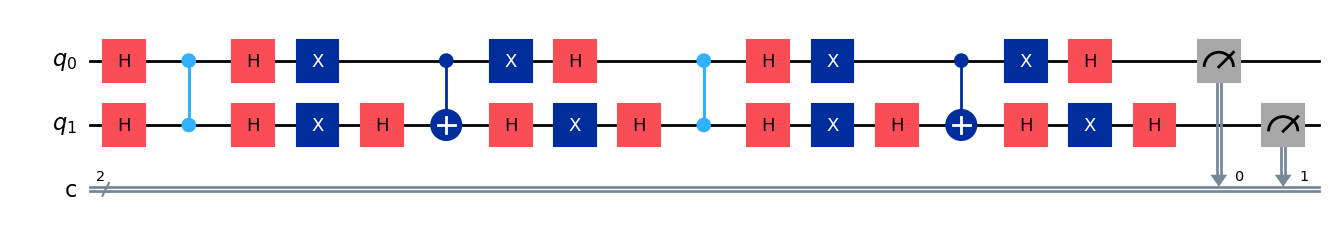

Measurement counts: {'10': 265, '01': 272, '00': 246, '11': 241}


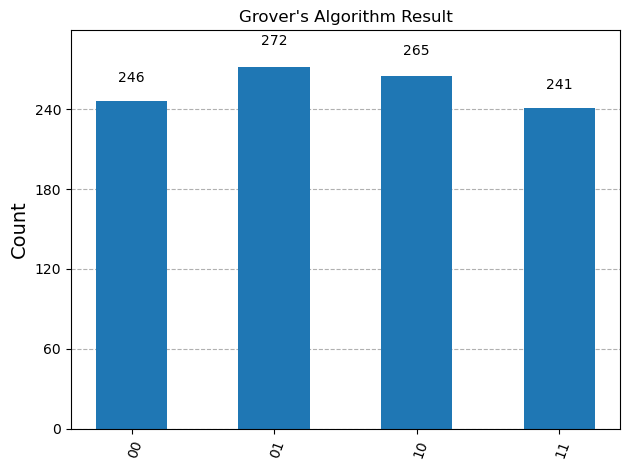

Most frequently measured state: |01⟩
Target state: |11⟩
Success: No


In [13]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
from qiskit.circuit.library import GroverOperator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
from qiskit_aer import AerSimulator

backend = AerSimulator()

# Step 1: Create oracle circuit that marks |11⟩
oracle = QuantumCircuit(2)
oracle.cz(0, 1)  # Mark |11⟩ state
oracle.name = 'Oracle'
print(oracle)
# Step 2: Create Grover operator
grover_op = GroverOperator(oracle)

# Step 3: Create complete circuit
N = 2**2  # Total states
num_solutions = 1  # Just |11⟩
optimal_iterations = int(np.round(np.pi / 4 * np.sqrt(N / num_solutions)))
print(f"Optimal iterations: {optimal_iterations}")

# Build main circuit
circuit = QuantumCircuit(2, 2)
circuit.h([0, 1])  # Put in superposition

# Apply Grover operator
for _ in range(optimal_iterations):
    circuit = circuit.compose(grover_op.decompose())

# Measure
circuit.measure([0, 1], [0, 1])

# Visualize circuit
display(circuit.draw('mpl'))

# Run on simulator
#backend = Aer.get_backend('qasm_simulator')
result = backend.run(circuit, shots=1024).result()
counts = result.get_counts()

# Clean up keys (optional: Qiskit 2.0 often handles this fine)
flat_counts = {k.replace(' ', ''): v for k, v in counts.items()}

# Display results
print("Measurement counts:", flat_counts)
display(plot_histogram(flat_counts, title="Grover's Algorithm Result"))

# Analysis
max_result = max(flat_counts, key=flat_counts.get)
print(f"Most frequently measured state: |{max_result}⟩")
print(f"Target state: |11⟩")
print(f"Success: {'Yes' if max_result == '11' else 'No'}")


## Wrapping the Oracle and Grover's Functionality into Functions

Thankfully, it is relatively straightforward to create our own functions to encapsulate both the Oracle and the Grover's algorithm.

You can see in the code below that we have introduced a function to create an Oracle and also a function to create the diffusion required by the Grover's implementation.

Problem: We have 2^2 = 4 elements in our search space
We want to find the element corresponding to the binary string: 11
Grover's algorithm circuit (without measurements):


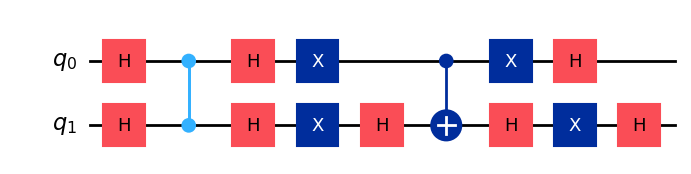


Measurement results:


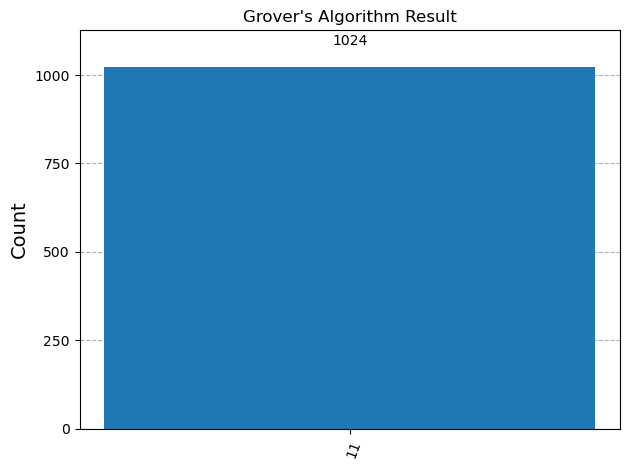


Analysis:
Most frequently measured state: |11⟩
Target state: |11⟩
Success: Yes
Probability of measuring the correct answer: 1.0000 (1024 out of 1024 shots)


In [16]:
# Let's implement a simple search problem:
# We have 4 items (requiring 2 qubits to represent)
# We want to find a specific item (let's say '11' which is decimal 3)

nb_qubits = 2  # We need 2 qubits to represent 4 items (00, 01, 10, 11)
target = '11'   # We're looking for this specific value - changed from '10' to '11'

print(f"Problem: We have 2^{nb_qubits} = {2**nb_qubits} elements in our search space")
print(f"We want to find the element corresponding to the binary string: {target}")

# The "Oracle" is a quantum circuit that marks the solution
# In this case, the oracle will add a negative phase to the state |11⟩
def create_oracle():
    oracle = QuantumCircuit(nb_qubits, name="Oracle")
    # For |11⟩, we can use the simple CZ gate since both qubits need to be |1⟩
    oracle.cz(0, 1)  # This directly marks |11⟩ - much simpler than the |10⟩ case!
    return oracle

# The "Diffusion" or "Reflection" operator reflects the state 
# around the average amplitude
def create_diffusion():
    diffusion = QuantumCircuit(nb_qubits, name="Diffusion")
    # Apply H gates to all qubits
    for qubit in range(nb_qubits):
        diffusion.h(qubit)
    # Apply X gates to all qubits
    for qubit in range(nb_qubits):
        diffusion.x(qubit)
    # Apply a multi-controlled Z gate
    # (for 2 qubits, this is just a CZ gate with a H on the target)
    diffusion.h(1)
    diffusion.cx(0, 1)
    diffusion.h(1)
    # Undo the X gates
    for qubit in range(nb_qubits):
        diffusion.x(qubit)
    # Undo the H gates
    for qubit in range(nb_qubits):
        diffusion.h(qubit)
    return diffusion

# Now let's create the full Grover algorithm circuit
def create_grover_circuit(iterations):
    # Create circuit with enough qubits and classical bits to handle the problem
    grover = QuantumCircuit(nb_qubits, nb_qubits)
    
    # Step 1: Create superposition
    grover.h(range(nb_qubits))
    
    # Step 2: Apply iterations of the Grover operator (oracle followed by diffusion)
    oracle = create_oracle()
    diffusion = create_diffusion()
    
    for _ in range(iterations):
        # Apply oracle
        grover = grover.compose(oracle)
        # Apply diffusion
        grover = grover.compose(diffusion)
    
    # Step 3: Measure the qubits
    grover.measure(range(nb_qubits), range(nb_qubits))
    
    return grover

# For 4 elements, we need approximately √4 = 2 iterations
# But in this simple case, 1 iteration is actually optimal
grover_circuit = create_grover_circuit(iterations=1)

# Draw the circuit (without measurements to make it more readable)
circuit_to_draw = create_grover_circuit(iterations=1)
circuit_to_draw.remove_final_measurements()
print("Grover's algorithm circuit (without measurements):")
display(circuit_to_draw.draw('mpl'))

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(grover_circuit, shots=1024).result()
counts = result.get_counts()

# Display results
print("\nMeasurement results:")
display(plot_histogram(counts, title="Grover's Algorithm Result"))

# Check if we found the right answer
print("\nAnalysis:")
max_result = max(counts, key=counts.get)
print(f"Most frequently measured state: |{max_result}⟩")
print(f"Target state: |{target}⟩")
print(f"Success: {'Yes' if max_result == target else 'No'}")
print(f"Probability of measuring the correct answer: {counts.get(target, 0)/1024:.4f} ({counts.get(target, 0)} out of 1024 shots)")

## Visualizing Probability Amplification in Grover's Algorithm

One of the most fascinating aspects of Grover's algorithm is how it systematically increases the probability of measuring the target state with each iteration. Let's analyze this behavior:

### Key Concepts:

1. **Initial State**: After the first superposition (Step 1), all states have equal probability of 1/N = 1/4 = 25%
2. **Oracle Effect**: The oracle marks the target state by flipping its phase, but doesn't change measurement probabilities yet
3. **Diffusion Effect**: The diffusion operator reflects all amplitudes around their average, which amplifies marked states and reduces unmarked ones
4. **Optimal Iterations**: There's a "sweet spot" - too few iterations don't maximize the probability, too many can actually decrease it

### What We'll Observe:

- **Iteration 0**: All states have 25% probability (uniform distribution)
- **Iteration 1**: Target state probability increases significantly (approaching ~90% for our 2-qubit example)
- **Beyond Optimal**: Probability starts decreasing due to the oscillatory nature of quantum amplitudes

### Mathematical Insight:

The optimal number of iterations is approximately **π/4 × √(N/M)**, where:
- N = total number of states (4 in our case)
- M = number of target states (1 in our case)

For our example: π/4 × √(4/1) = π/4 × 2 ≈ 1.57 ≈ **1 iteration**

This visualization will show you why Grover's algorithm is so precise - it's not just about amplification, it's about stopping at exactly the right moment!

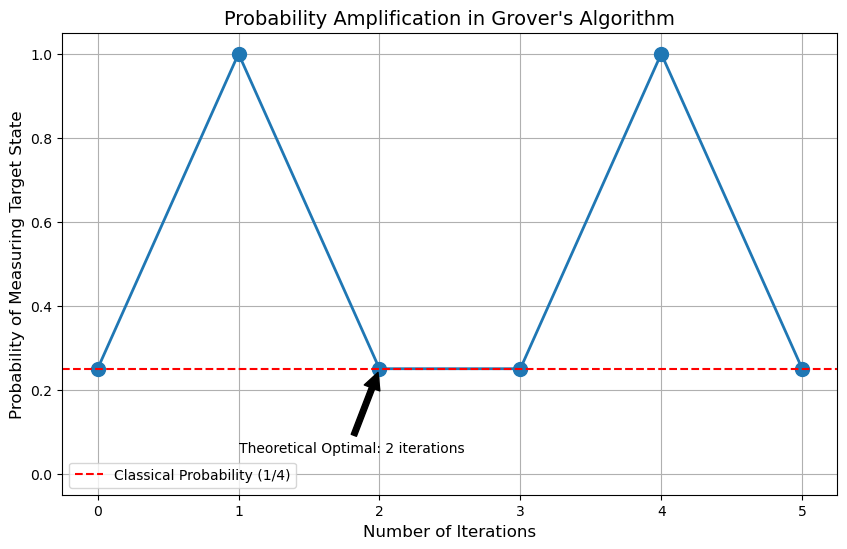

Optimal number of iterations for 4 elements: 2
Notice how the probability increases and then decreases. This is why we need to run
the optimal number of iterations - not too many and not too few.


In [15]:
# Let's demonstrate how the probability of finding the solution increases with iterations
from qiskit.quantum_info import Statevector

# Function to simulate the algorithm and return the probability of measuring the target
def simulate_iterations(num_iterations):
    probs = []
    
    for i in range(num_iterations + 1):  # +1 to include initial state
        # Create circuit without measurements
        circuit = QuantumCircuit(nb_qubits)
        circuit.h(range(nb_qubits))
        
        oracle = create_oracle()
        diffusion = create_diffusion()
        
        for _ in range(i):  # Apply i iterations
            circuit = circuit.compose(oracle)
            circuit = circuit.compose(diffusion)
        
        # Get statevector
        state = Statevector.from_instruction(circuit)
        
        # Get probability of target state
        # Convert target from string to integer index
        target_index = int(target, 2)
        prob = state.probabilities()[target_index]
        probs.append(prob)
    
    return probs

# Simulate up to 5 iterations
max_iterations = 5
probs = simulate_iterations(max_iterations)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(max_iterations + 1), probs, marker='o', markersize=10, linewidth=2)
plt.grid(True)
plt.xlabel('Number of Iterations', fontsize=12)
plt.ylabel('Probability of Measuring Target State', fontsize=12)
plt.title('Probability Amplification in Grover\'s Algorithm', fontsize=14)

# Add horizontal line at 0.25 (initial probability)
plt.axhline(y=0.25, color='r', linestyle='--', label='Classical Probability (1/4)')

# Annotate the optimal number of iterations
opt_iters = int(np.round(np.pi/4 * np.sqrt(2**nb_qubits)))
opt_index = min(opt_iters, max_iterations)
plt.annotate(f'Theoretical Optimal: {opt_iters} iterations', 
             xy=(opt_index, probs[opt_index]), 
             xytext=(opt_index-1, probs[opt_index]-0.2),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.xticks(range(max_iterations + 1))
plt.ylim(-0.05, 1.05)
plt.legend()
plt.show()

print(f"Optimal number of iterations for {2**nb_qubits} elements: {opt_iters}")
print("Notice how the probability increases and then decreases. This is why we need to run")
print("the optimal number of iterations - not too many and not too few.")

### Scaling of Grover's Algorithm

A key benefit of Grover's algorithm is its quadratic speedup over classical algorithms. Let's summarize the scaling:

- **Classical Search**: O(N) operations, where N is the number of items
- **Grover's Algorithm**: O(√N) operations

This means:

| Number of Items (N) | Classical (N) | Quantum (√N) |
|------------------|-------------|-------------|
| 100              | 100         | 10          |
| 1,000            | 1,000       | ~32         |
| 1,000,000        | 1,000,000   | ~1,000      |
| 2^128 (secure key) | 2^128 (~10^38) | 2^64 (~10^19) |

While this is not as dramatic as Shor's algorithm's exponential speedup, it's still significant for large datasets and has broad applications since many problems can be reframed as search problems.

The optimal number of iterations for Grover's algorithm is approximately π/4 × √N, which we saw in our example with N=4 gives us roughly 1 iteration as optimal.

### Conclusion: Grover's Algorithm

Grover's algorithm demonstrates a clear quantum advantage for search problems with its quadratic speedup. Key takeaways include:

1. The algorithm is optimal - no quantum algorithm can do better than O(√N) for an unstructured search.
2. The number of iterations is critical - too few or too many will reduce the probability of success.
3. The algorithm can find multiple solutions with appropriate adjustments to the number of iterations.
4. While the quadratic speedup is not as dramatic as other quantum algorithms like Shor's, it's more broadly applicable.

Grover's algorithm is particularly important because many problems can be reframed as search problems, making it useful for optimization, constraint satisfaction, and cryptanalysis applications.

## VQE (Variational Quantum Eigensolver)

Now let's explore another important quantum algorithm...